In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
import tensorflow as tf

In [93]:
x_data = np.linspace(0.0,10.0,1000000)

In [49]:
noise = np.random.randn(len(x_data))

y = mx + b

b = 5


In [50]:
y_true = (0.5 * x_data) + 5 + noise

In [51]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [52]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [53]:
my_data = pd.concat([x_df, y_df], axis=1)

In [54]:
sample_data = my_data.sample(250)

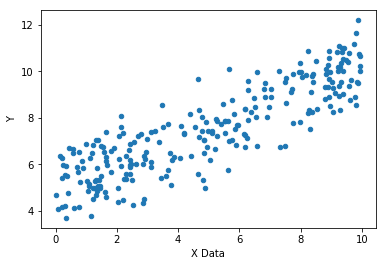

In [55]:
sample_data.plot(kind='scatter', x='X Data', y='Y')

In [56]:
batch_size = 8
# batch size required to steadily feed data into neural networks

In [57]:
np.random.randn(2)

array([-0.87352048, -0.96998537])

In [58]:
m = tf.Variable(0.94)
b = tf.Variable(-1.05)

In [59]:
x_ph = tf.placeholder(tf.float32,[batch_size])
y_ph = tf.placeholder(tf.float32,[batch_size])

In [60]:
y_model = m * x_ph + b

In [61]:
error = tf.reduce_sum(tf.square(y_ph-y_model))

In [62]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [63]:
train = optimizer.minimize(error)

In [64]:
init = tf.global_variables_initializer()

In [65]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = { x_ph: x_data[rand_ind], y_ph: y_true[rand_ind]}
        
        sess.run(train, feed_dict = feed)
    
    model_m, model_b = sess.run([m,b])
        

In [66]:
model_m

0.56297815

In [67]:
model_b

5.0583086

In [68]:
y_hat = x_data*model_m + model_b

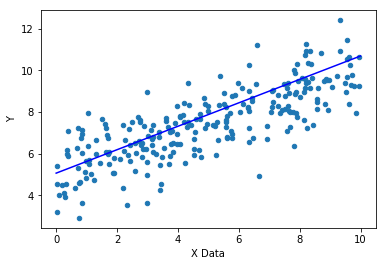

In [69]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'b')

In [70]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [71]:
feat_cols

[_NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [72]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Dennis\\AppData\\Local\\Temp\\tmpc5948762', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001B051AFB6D8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [75]:
x_train.shape

(700000,)

In [76]:
x_eval.shape

(300000,)

In [77]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, 
                                                batch_size=8, num_epochs=None, 
                                                shuffle=True)

In [78]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, 
                                                batch_size=8, num_epochs=1000, 
                                                shuffle=False)

In [79]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_eval}, y_eval, 
                                                batch_size=8, num_epochs=1000, 
                                                shuffle=False)

In [80]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Dennis\AppData\Local\Temp\tmpc5948762\model.ckpt.
INFO:tensorflow:loss = 521.20465, step = 1
INFO:tensorflow:global_step/sec: 1226.99
INFO:tensorflow:loss = 25.77526, step = 101 (0.082 sec)
INFO:tensorflow:global_step/sec: 2506.65
INFO:tensorflow:loss = 20.912304, step = 201 (0.040 sec)
INFO:tensorflow:global_step/sec: 2506.65
INFO:tensorflow:loss = 9.664169, step = 301 (0.040 sec)
INFO:tensorflow:global_step/sec: 2506.7
INFO:tensorflow:loss = 19.165783, step = 401 (0.040 sec)
INFO:tensorflow:global_step/sec: 2445.53
INFO:tensorflow:loss = 8.06839, step = 501 (0.041 sec)
INFO:tensorflow:global_step/sec: 2278.82
INFO:tensorflow:loss = 3.758994, step = 601 (0.044 sec)
INFO:tensorflow:global_step/sec: 

In [81]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-06-06:09:50
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Dennis\AppData\Local\Temp\tmpc5948762\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-06-06:09:50
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0666806, global_step = 1000, loss = 8.533444


In [82]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-06-06:09:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Dennis\AppData\Local\Temp\tmpc5948762\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-06-06:09:51
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0516019, global_step = 1000, loss = 8.412815


In [83]:
print('Training data metrics')
print(train_metrics)

Training data metrics
{'average_loss': 1.0666806, 'loss': 8.533444, 'global_step': 1000}


In [84]:
print("Eval metrics")
print(eval_metrics)

Eval metrics
{'average_loss': 1.0516019, 'loss': 8.412815, 'global_step': 1000}


good indicator of overfitting: low loss on training, high loss on eval

should expect eval to do worse than training, but best to be relatively similar

In [85]:
brand_new_data = np.linspace(0,10,10)

In [86]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': brand_new_data },
                                                     shuffle=False)

In [87]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Dennis\AppData\Local\Temp\tmpc5948762\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.432268], dtype=float32)},
 {'predictions': array([5.0807996], dtype=float32)},
 {'predictions': array([5.729331], dtype=float32)},
 {'predictions': array([6.377862], dtype=float32)},
 {'predictions': array([7.026394], dtype=float32)},
 {'predictions': array([7.674925], dtype=float32)},
 {'predictions': array([8.323456], dtype=float32)},
 {'predictions': array([8.971987], dtype=float32)},
 {'predictions': array([9.62052], dtype=float32)},
 {'predictions': array([10.269051], dtype=float32)}]

In [88]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])
    

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Dennis\AppData\Local\Temp\tmpc5948762\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [89]:
predictions

[array([4.432268], dtype=float32),
 array([5.0807996], dtype=float32),
 array([5.729331], dtype=float32),
 array([6.377862], dtype=float32),
 array([7.026394], dtype=float32),
 array([7.674925], dtype=float32),
 array([8.323456], dtype=float32),
 array([8.971987], dtype=float32),
 array([9.62052], dtype=float32),
 array([10.269051], dtype=float32)]

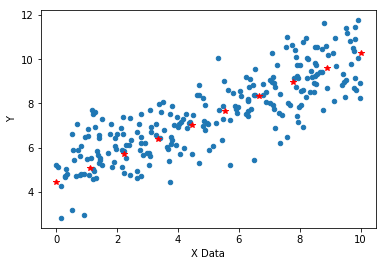

In [90]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(brand_new_data, predictions, 'r*')